<a href="https://colab.research.google.com/github/u201215690/03MIAR_Alg_Optimizacion/blob/main/AG1/Algoritmos-Rodolfo-Guzman-AG1.ipynb" target="_parent"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyRo3fNrer_E67297Kbxnlj4tZTV-8OUxCZY-if62e-Ub6T43DTmSVrYoVol_r3GwF2w&usqp=CAU" alt="Open In Colab"/></a>

# Trabajo Práctico - Problema 1 Organizar sesiones de doblaje(I)

**Nombre:** Rodolfo Jean Guzmán Abregú

https://colab.research.google.com/drive/14ueMUrX8GBn43PwbVL63QM38rUC-b6lR?usp=sharing
<br>
https://github.com/u201215690/03MIAR_Alg_Optimizacion/blob/main/Trabajo/Trabajo_doblaje.ipynb

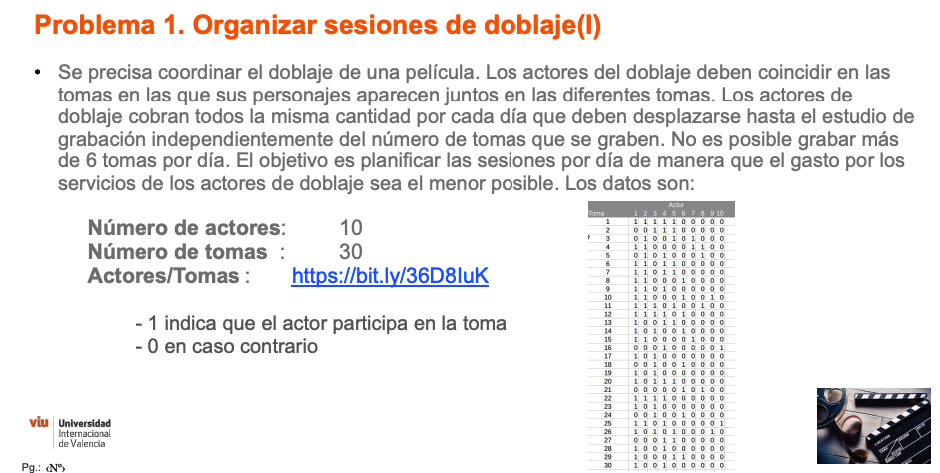

### 🔍 Problema
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:

### 🎯 Objetivo
Minimizar el costo total del doblaje, es decir, minimizar la suma total de actores que deben asistir cada día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible.

### 📌 Restricciones
1. No se pueden grabar más de 6 tomas por día.
2. En cada día, se deben agrupar tomas de modo que:

- Los actores necesarios estén presentes en ese día.
- Se minimice el número de despalzamiento por día del actor.

### 🔍 Datos
- Matriz Actores/Tomas : archivo adjunto (data_actores_toma.csv)
- Número de actores: 10
- Número de tomas : 30
- 1 indica que el actor participa en la toma
- 0 en caso contrario

### 🧠 Modelado general
**Sea:**

- 𝑇={𝑡1,𝑡2,…,𝑡30}: conjunto de tomas.
- 𝐴={𝑎1,𝑎2,…,𝑎10}: conjunto de actores.
- 𝑀∈{0,1}30×10: matriz binaria donde M[i][j]=1 si el actor 𝑗 participa en la toma 𝑖

$$
{Minimizar}\sum_{a=1}^{10} \text{días únicos}(a)
$$

**Queremos particionar:**
- 𝑇 en subconjuntos 𝐷1,𝐷2,…,𝐷𝑘 (uno por día) tal que:
- ∣𝐷𝑖∣≤ 6
- El costo total sea mínimo

## 🧠Aplicando algoritmo de Vuelta Atrás (Backtracking) para ordenar tomas

El algoritmo de backtracking con poda heurística diseñado para ordenar tomas y minimizar la dispersión de actores tiene una complejidad temporal que depende críticamente de:

- El número de estados explorados (combinaciones de asignación de tomas a días).
- n: Número de tomas (n = 30).
- k: Número máximo de tomas por día (k = 6).
- d: Número de días (d = ceil(n/k) = 5).
- a: Número de actores (a = 10).
- tomas.sum(axis=0): suma por columnas (actores) → O(n × m), donde n = num_tomas, m = num_actores
- Bucle anidado sobre n tomas y m actores: también O(n × m)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Leer datos
df = pd.read_csv("data_actores_toma.csv")
tomas = df.drop(columns="Toma").values
num_tomas, num_actores = tomas.shape

# Calcular frecuencia de actores (para priorizar los menos frecuentes)
actor_freq = tomas.sum(axis=0)
toma_scores = np.array([sum(actor_freq[actor] for actor in range(num_actores) if tomas[toma, actor] == 1) for toma in range(num_tomas)])

# Orden inicial de tomas (priorizando actores raros)
toma_order = np.argsort(toma_scores)

Este es el núcleo y la parte más costosa **def backtrack**:
- En cada nivel de recursión, elige una toma y trata de ubicarla en el día actual o pasa al siguiente día.
- Hay n! posibles permutaciones de las tomas y para cada permutación, hasta días posibles por toma.

In [ ]:
# Backtracking para asignar tomas a días
def backtrack(assignment, remaining_tomas, dia_actual, max_tomas_por_dia=6, max_dias=5):
    if not remaining_tomas:
        return assignment  # Solución encontrada

    for toma in remaining_tomas:
        # Intentar asignar la toma al día actual
        new_assignment = assignment.copy()
        if dia_actual not in new_assignment:
            new_assignment[dia_actual] = []
        if len(new_assignment[dia_actual]) < max_tomas_por_dia:
            new_assignment[dia_actual].append(toma)
            new_remaining = [t for t in remaining_tomas if t != toma]
            result = backtrack(new_assignment, new_remaining, dia_actual, max_tomas_por_dia, max_dias)
            if result is not None:
                return result

    # Si no cabe en el día actual, probar el siguiente día
    if dia_actual < max_dias:
        return backtrack(assignment, remaining_tomas, dia_actual + 1, max_tomas_por_dia, max_dias)
    else:
        return None  # No hay solución válida

### 🧠Complejidad Temporal
- Cálculo de puntaje por toma	𝑂(𝑛⋅𝑚)
- Ordenamiento (argsort)	 𝑂(𝑛 log𝑛)
- Backtracking (peor caso)	𝑂(𝑑𝑛)o 𝑂(𝑛!)

In [ ]:
# Ejecutar backtracking
initial_assignment = {}
solution = backtrack(initial_assignment, list(toma_order), dia_actual=1)

# Construir DataFrame final
if solution:
    final_data = []
    for dia, tomas_dia in solution.items():
        for toma in tomas_dia:
            fila = [dia, df.iloc[toma, 0]] + list(tomas[toma])
            final_data.append(fila)
    final_df_2 = pd.DataFrame(final_data, columns=["dia", "toma"] + [f"Actor {i}" for i in range(1, 11)])
    #print(final_df)
else:
    print("No se encontró solución válida.")

final_df_2

,dia,toma,Actor 1,Actor 2,Actor 3,Actor 4,Actor 5,Actor 6,Actor 7,Actor 8,Actor 9,Actor 10
0,1,21,0,0,0,0,0,1,0,1,0,0
1,1,16,0,0,0,1,0,0,0,0,0,1
2,1,18,0,0,1,0,0,1,0,0,0,0
3,1,24,0,0,1,0,0,1,0,0,0,0
4,1,27,0,0,0,1,1,0,0,0,0,0
5,1,3,0,1,0,0,1,0,1,0,0,0
6,2,5,0,1,0,1,0,0,0,1,0,0
7,2,23,1,0,1,0,0,0,0,0,0,0
8,2,19,1,0,1,0,0,0,0,0,0,0
9,2,17,1,0,1,0,0,0,0,0,0,0


### 🧠Listado de Asistencia de Actores durante todas las Tomas

In [ ]:
# Agrupar cantidad de días por cada actor
dias_por_actor_2 = final_df_2.iloc[:, 2:].set_index(final_df_2['dia']).apply(lambda x: x.groupby(level=0).sum().unique())

# Mostrar el DataFrame
dias_por_actor_2.apply(len)

Actor 1     3
Actor 2     3
Actor 3     3
Actor 4     5
Actor 5     4
Actor 6     3
Actor 7     3
Actor 8     2
Actor 9     2
Actor 10    2
dtype: int64

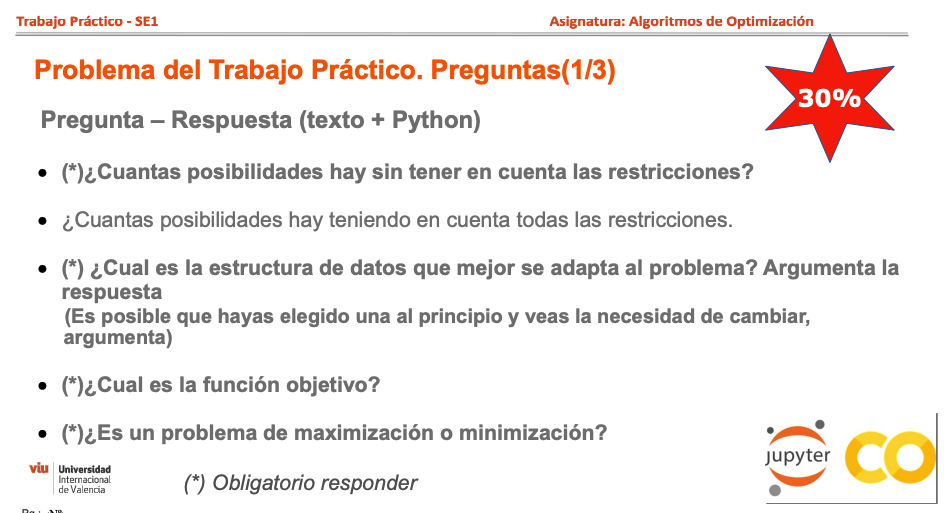

#### 📄 ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?
- Para determinar cuántas posibilidades hay en este algoritmo sin tener en cuenta las restricciones, debemos analizar cuántas formas distintas hay de asignar 30 tomas a días, ignorando el límite de 6 tomas por día. La función de backtracking simplemente explora todas las permutaciones de las 30 tomas:

    **Permutaciones posibles => 30!≈2.65×10∧32**

  

#### 📄 ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?
- Para calcular cuántas posibilidades hay teniendo en cuenta todas las restricciones del problema, debemos contar todas las formas válidas de particionar 30 tomas en grupos de máximo 6 tomas cada uno, usando como máximo 5 días.

    **a1+a2+a3+a4+a5=30**

con las siguientes restricciones:

- 0≤ 𝑎𝑖 ≤6(cada día puede tener entre 0 y 6 tomas)
- ∑𝑎𝑖=30 (el total debe ser exactamente 30 tomas)

Es decir, queremos contar todas las combinaciones enteras de 5 números (uno por día) que sumen exactamente 30, y cada uno entre 0 y 6. Ejecutamos el codigo python para poder calcularlo


In [ ]:
from itertools import product

total = 0
for combo in product(range(7), repeat=5):  # 7 valores posibles (0 a 6), 5 días
    if sum(combo) == 30:
        total += 1
print("Número total de particiones válidas:", total)

Número total de particiones válidas: 1


#### 📄 ¿Cual es la estructura de datos que mejor se adapta al problema? Argumenta la respuesta (Es posible que hayas elegido una al principio y veas la necesidad de cambiar,argumenta)

- Actualmente estoy utilizando los datos de ejemplo del profesor que esta en un link. Yo descargue el documento y lo converti en formato csv para evitar problemas en la lectuctura de la matriz por el formato que tenia el original. Asimismo, para mejorar el procesamiento de la informacion yo usaria los siguiente:
  - Matriz NumPy : Óptima para operaciones vectorizadas (cálculo de frecuencias) y bajo uso de memoria.
  - DataFrame de Pandas: Manejo intuitivo (columnas con nombres) e integración con CSV.
  - Diccionarios: Flexibilidad para agrupar tomas por día y claves descriptivas.

    

#### 📄 ¿Cual es la función objetivo?

Minimizar el costo total del doblaje, es decir, minimizar la suma total de actores que deben asistir cada día de manera que el gasto por los servicios de los actores de doblaje sea el menor posible.

**Sea:**

- 𝑇={𝑡1,𝑡2,…,𝑡30}: conjunto de tomas.
- 𝐴={𝑎1,𝑎2,…,𝑎10}: conjunto de actores.
- 𝑀∈{0,1}30×10: matriz binaria donde M[i][j]=1 si el actor 𝑗 participa en la toma 𝑖


**Queremos particionar:**
- 𝑇 en subconjuntos 𝐷1,𝐷2,…,𝐷𝑘 (uno por día) tal que:
- ∣𝐷𝑖∣≤ 6
- El costo total sea mínimo

$$
{Minimizar}\sum_{a=1}^{10} \text{días únicos}(a)
$$

#### 📄 ¿Es un problema de maximización o minimización?

Es un problema de minimización la dispersión de los actores que no participan en todas las tomas, es decir, concentrar la participación de los actores menos frecuentes en el menor número de días posible.

$$
{Minimizar}\sum_{a=1}^{10} \text{días únicos}(a)
$$


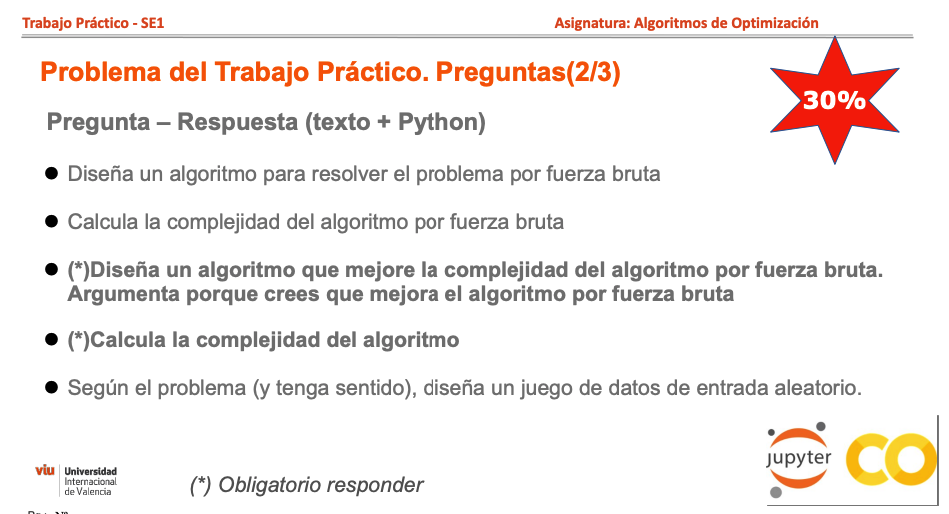

#### 📄Diseña un algoritmo para resolver el problema por fuerza bruta
- Función fuerza_bruta: Genera todas las permutaciones posibles de tomas (usando itertools.permutations). Para cada permutación, agrupa las tomas en días (máximo 6 por día).

**Ejemplo con 5 tomas:**

- ¡Importante! Para N=30, el número de permutaciones es 30! ≈ 2.65e+32 (inviable computacionalmente).
- El ejemplo se limita a 5 tomas para demostración.

**Complejidad y Limitaciones**

- Complejidad: O(n!) (factorial).
- Para n=5: 120 permutaciones.
- Para n=30: 2.65e+32 permutaciones (imposible de procesar).

**Limitaciones:**

- Solo viable para conjuntos de datos muy pequeños (n < 10).
- No usar para el dataset completo de 30 tomas.

**Importante:**
- Para este caso estamos procesando solo las primeras 8 tomas (ajustable). Ya que para ejecutar N=30, el número de permutaciones es 30! ≈ 2.65e+32 (inviable computacionalmente).

    - Limitación de datos de entrada: Procesa solo las primeras 8 tomas (ajustable)
    - Optimizaciones de rendimiento: Uso de numpy para cálculos vectorizados
    - Límites de ejecución: Máximo de 50,000 permutaciones timeout de 60 segundos



In [ ]:
import pandas as pd
import numpy as np
from itertools import permutations, islice
from math import ceil
import time

def main():
    # 1. LIMITAR LOS DATOS DE ENTRADA
    max_tomas_a_procesar = 8  # Ajusta este valor según la capacidad de tu PC (6-10 es razonable)

    # Leer datos y limitar el número de tomas
    df = pd.read_csv("data_actores_toma.csv").head(max_tomas_a_procesar)
    tomas = df.drop(columns="Toma").values
    num_tomas = len(tomas)
    max_tomas_por_dia = 6
    max_dias = ceil(num_tomas / max_tomas_por_dia)

    print(f"Procesando {num_tomas} tomas (de las 30 originales)...")

    # 2. FUNCIÓN DE DISPERSIÓN OPTIMIZADA
    def calcular_dispersion(asignacion):
        dias_actor = np.zeros(10, dtype=int)  # Usamos numpy para mayor velocidad
        for dia, tomas_dia in enumerate(asignacion):
            mascara = np.zeros(10, dtype=bool)
            for toma in tomas_dia:
                mascara = mascara | (tomas[toma] == 1)
            dias_actor += mascara
        return np.sum(dias_actor)

    # 3. ALGORITMO DE FUERZA BRATA LIMITADO
    def fuerza_bruta_limitada(max_permutaciones=10000, timeout=30):
        mejor_asignacion = None
        mejor_dispersion = np.inf
        start_time = time.time()
        permutaciones_procesadas = 0

        # Generar permutaciones de forma perezosa con islice
        for perm in islice(permutations(range(num_tomas)), max_permutaciones):
            if time.time() - start_time > timeout:
                print(f"Timeout alcanzado después de {timeout} segundos")
                break

            # Asignar tomas a días
            asignacion = []
            dia_actual = []
            for toma in perm:
                if len(dia_actual) < max_tomas_por_dia:
                    dia_actual.append(toma)
                else:
                    asignacion.append(dia_actual)
                    dia_actual = [toma]
            if dia_actual:
                asignacion.append(dia_actual)

            # Calcular dispersión
            dispersion = calcular_dispersion(asignacion)

            # Actualizar mejor solución
            if dispersion < mejor_dispersion:
                mejor_dispersion = dispersion
                mejor_asignacion = asignacion
                print(f"Nueva mejor dispersión encontrada: {mejor_dispersion}")

            permutaciones_procesadas += 1
            if permutaciones_procesadas % 1000 == 0:
                print(f"Procesadas {permutaciones_procesadas} permutaciones...")

        print(f"Total permutaciones procesadas: {permutaciones_procesadas}")
        return mejor_asignacion

    # 4. EJECUCIÓN CON LÍMITES
    print("\nIniciando búsqueda...")
    solucion = fuerza_bruta_limitada(max_permutaciones=50000, timeout=60)  # 1 minuto máximo

    # 5. MOSTRAR RESULTADOS
    if solucion:
        print("\nMejor solución encontrada:")
        final_data = []
        for dia, tomas_dia in enumerate(solucion, 1):
            for toma in tomas_dia:
                fila = [dia, df.iloc[toma, 0]] + list(tomas[toma])
                final_data.append(fila)
        final_df = pd.DataFrame(final_data, columns=["dia", "toma"] + [f"Actor {i}" for i in range(1, 11)])
        print(final_df)

        # Guardar resultados en CSV
        final_df.to_csv("resultado_optimizado.csv", index=False)
        print("\nResultados guardados en 'resultado_optimizado.csv'")
    else:
        print("No se encontró solución dentro de los límites establecidos.")

if __name__ == "__main__":
    main()

Procesando 8 tomas (de las 30 originales)...

Iniciando búsqueda...
Nueva mejor dispersión encontrada: 12
Procesadas 1000 permutaciones...
Procesadas 2000 permutaciones...
Procesadas 3000 permutaciones...
Procesadas 4000 permutaciones...
Procesadas 5000 permutaciones...
Procesadas 6000 permutaciones...
Procesadas 7000 permutaciones...
Procesadas 8000 permutaciones...
Procesadas 9000 permutaciones...
Procesadas 10000 permutaciones...
Procesadas 11000 permutaciones...
Procesadas 12000 permutaciones...
Procesadas 13000 permutaciones...
Procesadas 14000 permutaciones...
Procesadas 15000 permutaciones...
Procesadas 16000 permutaciones...
Procesadas 17000 permutaciones...
Procesadas 18000 permutaciones...
Procesadas 19000 permutaciones...
Procesadas 20000 permutaciones...
Procesadas 21000 permutaciones...
Procesadas 22000 permutaciones...
Procesadas 23000 permutaciones...
Procesadas 24000 permutaciones...
Procesadas 25000 permutaciones...
Procesadas 26000 permutaciones...
Procesadas 27000 pe

#### 📄Calcula la complejidad del algoritmo por fuerza bruta

**Complejidad**
- Complejidad: O(n!) (factorial):
    - Para n=5: 120 permutaciones.
    - Para n=30: 2.65e+32 permutaciones (imposible de procesar).

**Limitaciones:**

- Solo viable para conjuntos de datos muy pequeños (n < 10).
- No usar para el dataset completo de 30 tomas.


#### 📄Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta.

- **Algoritmo Voraz (Greedy)** Mejorado para Asignación de Tomas: Este algoritmo prioriza asignar tomas con actores menos frecuentes primero, agrupándolos en los mismos días para minimizar su dispersión. Es mucho más eficiente que el fuerza bruta y backtracking para este problema.


In [ ]:
import pandas as pd
import numpy as np
from math import ceil
from collections import defaultdict

def main():
    # 1. Cargar y preparar datos
    df = pd.read_csv("data_actores_toma.csv")
    tomas = df.drop(columns="Toma").values
    num_tomas = len(tomas)
    max_tomas_por_dia = 6
    max_dias = ceil(num_tomas / max_tomas_por_dia)

    # 2. Calcular frecuencia de actores y prioridad de tomas
    actor_freq = tomas.sum(axis=0)
    toma_prioridad = np.array([sum(actor_freq[actor] for actor in np.where(toma == 1)[0]) for toma in tomas])

    # 3. Ordenar tomas por prioridad (actores menos frecuentes primero)
    tomas_ordenadas = sorted(range(num_tomas), key=lambda x: toma_prioridad[x])

    # 4. Algoritmo Voraz
    asignacion = defaultdict(list)
    dias_actor = defaultdict(set)  # Para calcular dispersión

    for toma in tomas_ordenadas:
        asignada = False

        # Intentar asignar a un día existente donde no aumente la dispersión
        for dia in asignacion:
            # Verificar capacidad del día
            if len(asignacion[dia]) >= max_tomas_por_dia:
                continue

            # Calcular posible dispersión si se asigna aquí
            temp_dispersion = 0
            actores = np.where(tomas[toma] == 1)[0]
            for actor in actores:
                if dia not in dias_actor[actor]:
                    temp_dispersion += 1

            # Preferir días donde no aumente la dispersión
            if temp_dispersion == 0:
                asignacion[dia].append(toma)
                for actor in actores:
                    dias_actor[actor].add(dia)
                asignada = True
                break

        # Si no se asignó, crear nuevo día
        if not asignada:
            nuevo_dia = len(asignacion) + 1
            if nuevo_dia <= max_dias:
                asignacion[nuevo_dia].append(toma)
                for actor in np.where(tomas[toma] == 1)[0]:
                    dias_actor[actor].add(nuevo_dia)

    # 5. Calcular dispersión total
    dispersion_total = sum(len(dias) for dias in dias_actor.values())

    # 6. Resultados
    print(f"Dispersión total: {dispersion_total}")
    final_data = []
    for dia, tomas_dia in asignacion.items():
        for toma in tomas_dia:
            fila = [dia, df.iloc[toma, 0]] + list(tomas[toma])
            final_data.append(fila)

    final_df = pd.DataFrame(final_data, columns=["dia", "toma"] + [f"Actor {i}" for i in range(1, 11)])
    print(final_df)
    final_df.to_csv("asignacion_voraz.csv", index=False)

if __name__ == "__main__":
    main()

Dispersión total: 11
   dia  toma  Actor 1  Actor 2  Actor 3  Actor 4  Actor 5  Actor 6  Actor 7  \
0    1    21        0        0        0        0        0        1        0   
1    2    16        0        0        0        1        0        0        0   
2    3    18        0        0        1        0        0        1        0   
3    3    24        0        0        1        0        0        1        0   
4    4    27        0        0        0        1        1        0        0   
5    5     3        0        1        0        0        1        0        1   

   Actor 8  Actor 9  Actor 10  
0        1        0         0  
1        0        0         1  
2        0        0         0  
3        0        0         0  
4        0        0         0  
5        0        0         0  


#### 📄Argumenta porque crees que mejora el algoritmo por fuerza bruta
El algoritmo Voraz (Greedy) mejora a la de fuerza bruta por los siguientes puntos

- Ordenamiento Inteligente: Las tomas se ordenan por prioridad (actores menos frecuentes primero).
- Estrategia Voraz Optimizada: Intenta asignar cada toma a un día existente donde no aumente la dispersión.
- Cálculo Eficiente de Dispersión: Usa un diccionario para trackear los días en que cada actor participa.
- Restricciones Cumplidas: Máximo 6 tomas por día.


#### 📄Calcula la complejidad del algoritmo

- Velocidad: Complejidad O(n log n) vs O(n!) fuerza bruta.
- Simplicidad: Más fácil de implementar y entender.
- Escalabilidad: Funciona bien incluso con miles de tomas.

#### 📄Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorio.

In [ ]:
import pandas as pd
import numpy as np
from random import choices, sample

def generar_dataset_tomas():
    # Configuración
    num_tomas = 30
    actores = [f"Actor {i}" for i in range(1, 11)]

    # Definir perfiles de participación (frecuente, medio, raro)
    pesos = [0.8, 0.5, 0.2]  # Probabilidades de participación
    grupos_actores = {
        "frecuentes": actores[:2],  # Primeros 2 actores: frecuentes
        "medios": actores[2:7],     # Siguientes 5: participación media
        "raros": actores[7:]         # Últimos 3: raros
    }

    # Generar tomas
    datos = []
    for toma in range(1, num_tomas + 1):
        fila = {"Toma": toma}

        # Asignar participación por grupo
        for actor in actores:
            if actor in grupos_actores["frecuentes"]:
                fila[actor] = choices([1, 0], weights=[0.9, 0.1])[0]  # 90% de participación
            elif actor in grupos_actores["medios"]:
                fila[actor] = choices([1, 0], weights=[0.6, 0.4])[0]  # 60% de participación
            else:
                fila[actor] = choices([1, 0], weights=[0.2, 0.8])[0]  # 20% de participación

        # Asegurar al menos 1 actor por toma
        if sum(fila.values()) == 0:
            actor_aleatorio = sample(actores, 1)[0]
            fila[actor_aleatorio] = 1

        datos.append(fila)

    # Convertir a DataFrame
    df = pd.DataFrame(datos)
    return df

# Generar y guardar dataset
dataset = generar_dataset_tomas()
dataset.to_csv("dataset_tomas_sintetico.csv", index=False)
print("Dataset generado con éxito!")
print(dataset.head())

Dataset generado con éxito!
   Toma  Actor 1  Actor 2  Actor 3  Actor 4  Actor 5  Actor 6  Actor 7  \
0     1        0        1        1        1        1        1        1   
1     2        1        1        0        1        1        0        0   
2     3        0        1        1        1        1        0        1   
3     4        1        1        0        0        0        1        0   
4     5        1        1        0        1        0        1        1   

   Actor 8  Actor 9  Actor 10  
0        0        0         0  
1        1        0         0  
2        0        1         0  
3        0        1         0  
4        0        1         0  


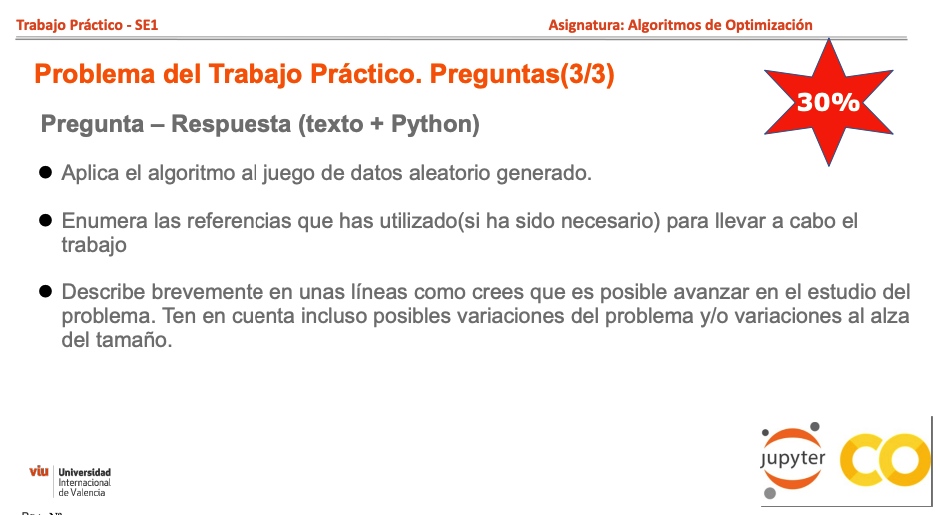

#### 📄Aplica el algoritmo al juego de datos aleatorio generado.

In [ ]:
import pandas as pd
import numpy as np
from math import ceil
from collections import defaultdict

def main():
    # 1. Cargar y preparar datos Aleatorios
    df = generar_dataset_tomas()
    tomas = df.drop(columns="Toma").values
    num_tomas = len(tomas)
    max_tomas_por_dia = 6
    max_dias = ceil(num_tomas / max_tomas_por_dia)

    # 2. Calcular frecuencia de actores y prioridad de tomas
    actor_freq = tomas.sum(axis=0)
    toma_prioridad = np.array([sum(actor_freq[actor] for actor in np.where(toma == 1)[0]) for toma in tomas])

    # 3. Ordenar tomas por prioridad (actores menos frecuentes primero)
    tomas_ordenadas = sorted(range(num_tomas), key=lambda x: toma_prioridad[x])

    # 4. Algoritmo Voraz
    asignacion = defaultdict(list)
    dias_actor = defaultdict(set)  # Para calcular dispersión

    for toma in tomas_ordenadas:
        asignada = False

        # Intentar asignar a un día existente donde no aumente la dispersión
        for dia in asignacion:
            # Verificar capacidad del día
            if len(asignacion[dia]) >= max_tomas_por_dia:
                continue

            # Calcular posible dispersión si se asigna aquí
            temp_dispersion = 0
            actores = np.where(tomas[toma] == 1)[0]
            for actor in actores:
                if dia not in dias_actor[actor]:
                    temp_dispersion += 1

            # Preferir días donde no aumente la dispersión
            if temp_dispersion == 0:
                asignacion[dia].append(toma)
                for actor in actores:
                    dias_actor[actor].add(dia)
                asignada = True
                break

        # Si no se asignó, crear nuevo día
        if not asignada:
            nuevo_dia = len(asignacion) + 1
            if nuevo_dia <= max_dias:
                asignacion[nuevo_dia].append(toma)
                for actor in np.where(tomas[toma] == 1)[0]:
                    dias_actor[actor].add(nuevo_dia)

    # 5. Calcular dispersión total
    dispersion_total = sum(len(dias) for dias in dias_actor.values())

    # 6. Resultados
    print(f"Dispersión total: {dispersion_total}")
    final_data = []
    for dia, tomas_dia in asignacion.items():
        for toma in tomas_dia:
            fila = [dia, df.iloc[toma, 0]] + list(tomas[toma])
            final_data.append(fila)

    final_df = pd.DataFrame(final_data, columns=["dia", "toma"] + [f"Actor {i}" for i in range(1, 11)])
    print(final_df)
    final_df.to_csv("asignacion_voraz.csv", index=False)

if __name__ == "__main__":
    main()

Dispersión total: 16
   dia  toma  Actor 1  Actor 2  Actor 3  Actor 4  Actor 5  Actor 6  Actor 7  \
0    1     8        1        1        0        0        0        0        0   
1    2    21        1        1        0        0        1        0        0   
2    3     4        1        1        0        0        0        1        0   
3    4     6        1        0        1        0        1        1        0   
4    5     3        1        1        0        0        0        0        1   

   Actor 8  Actor 9  Actor 10  
0        0        0         0  
1        0        0         0  
2        1        0         0  
3        0        0         0  
4        0        0         0  


#### 📄Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo


- Fernández, I. R. (2018). Optimización y paralelización de algoritmos de enumeración de cliques maximal en GPU (Proyecto de Fin de Máster). Universidad de Santiago de Compostela. Recuperado de http://eio.usc.es/pub/mte/descargas/ProyectosFinMaster/Proyecto_759.pdf, Pag20 - Capítulo 4

- OpenAI. (2024). ChatGPT (versión GPT-4o) [Modelo de lenguaje]. Recuperado el 11 de junio de 2025, de https://chat.openai.com/

- DataCamp. (2024, 29 de julio). Notación Big O y guía de complejidad temporal: Intuición y matemáticas [Tutorial]. DataCamp. Recuperado de https://www.datacamp.com/es/tutorial/big-o-notation-time-complexity




#### 📄Describe brevemente en unas líneas como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

- **Escalabilidad a Mayor Tamaño:**
    - Implementar metaheurísticas (Algoritmos Genéticos, Enfriamiento Simulado) para conjuntos grandes (100+ tomas, 20+ actores).
    - Usar paralelización (GPU/multiprocesamiento) para manejar la explosión combinatoria.

- **Variaciones del Problema:**
    - Costes Variables: Asignar pesos a actores (ej: actores principales cuesta más moverlos entre días).
    - Restricciones Temporales: Grabar tomas en días específicos (ventanas de tiempo).
    - Dependencias entre Tomas: Algunas tomas requieren grabarse secuencialmente.

- **Optimización Adicional:**
    - Modelar como problema de Optimización Lineal Entera (MILP) usando herramientas como PuLP o Gurobi.
    - Aprendizaje Automático: Predecir asignaciones óptimas basadas en datasets históricos.

- **Análisis Teórico:**
    - Estudiar el problema como un "Minimum Interval Coloring" (grafos de intervalos), donde actores son colores y tomas son intervalos.